# Decision tree Classifier implementation with post pruning:

In [1]:
# importing the libraries:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# importing the iris dataset form the sklearn
from sklearn.datasets import load_iris

#initilasing the dataset:
dataset = load_iris()

In [3]:
# geting description about the iris dataset
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# second way to importing the iris dataset with seaborn libraries
df = sns.load_dataset('iris')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# Independent and dependent features
x = df.iloc[:,:-1]        # independent feature
y = dataset.target          # dependent feature

In [8]:
x,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [9]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.33, random_state= 42)

In [10]:
# importing the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# post Pruning

In [11]:
# initailazation the decision tree classifier
treeclassifier = DecisionTreeClassifier()

In [12]:
# fiting with the classifier algoritham
treeclassifier.fit(x_train, y_train)            # by defalt it using gini parameter

DecisionTreeClassifier()

[Text(0.5416666666666666, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.3333333333333333, 0.5, 'x[3] <= 1.65\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.25, 0.21428571428571427, 'x[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0

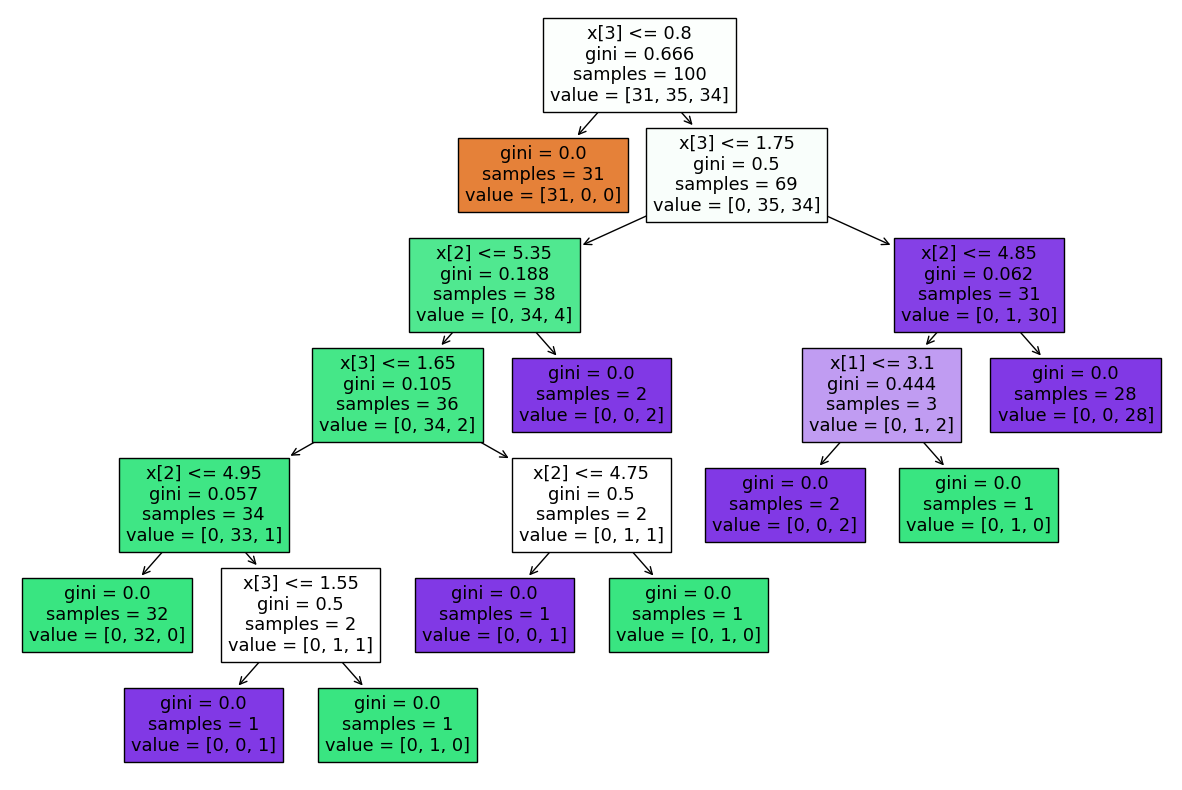

In [13]:
# displaying the treee with the help of sklearn
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier, filled= True)

In [14]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


In [15]:
# we pruning the tree in post proning with 2nd depth parameter: (checking by analysis)

# Post Pruning Technique

# Post proning with max_depth = 2 
treeclassifier = DecisionTreeClassifier(max_depth= 2)

In [16]:
#fiting the post proning with x-train and y-train
treeclassifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

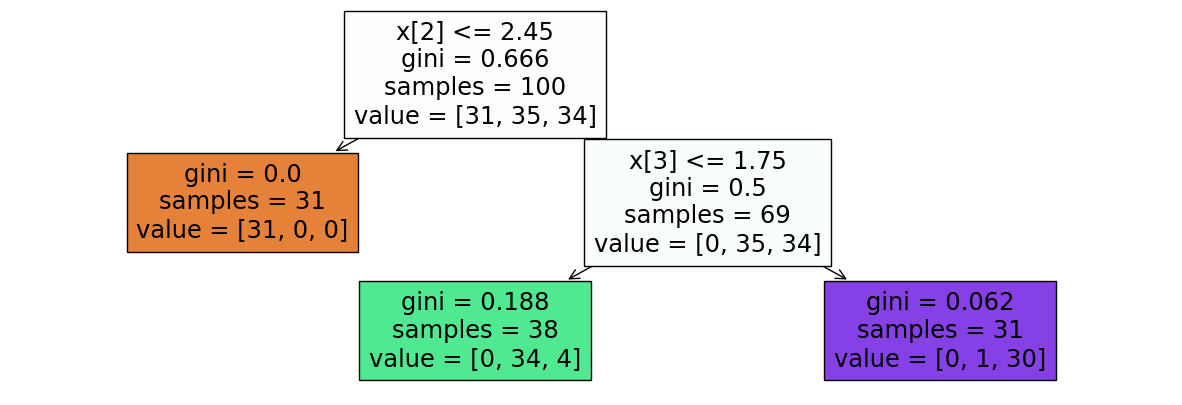

In [17]:
# displaying the tree with post proning technique
plt.figure(figsize= (15,5))
tree.plot_tree(treeclassifier, filled=True)

# Prediction 

In [18]:
y_pred = treeclassifier.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [19]:
# checking the accuracy-score, classification report
# importing the respective libraries
from sklearn.metrics import accuracy_score, classification_report

In [20]:
# Accuracy score
score = accuracy_score(y_pred,y_test)
print('Accuracy score is:', score)

Accuracy score is: 0.98


In [21]:
# classification report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [22]:
# Internal assingment 

In [23]:
from sklearn.datasets import load_breast_cancer

In [24]:
# initialising the dataset
dataset1 = load_breast_cancer()

In [25]:
dataset1.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [26]:
# converting breast dataset into dataframe format
df1 = pd.DataFrame(dataset1.data, columns= dataset1.feature_names)

# creating the datframe for the target value
df1['target'] = dataset1.target

df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [27]:
df1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [28]:
# dependent and independent feature 
x = df1.iloc[:,:-1]                # independent feature
y = dataset1.target                # dependent feature

In [29]:
x,y

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  mean conca

In [30]:
# train test split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.33, random_state= 42 )

In [31]:
# importing the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Post- Pruning (breast cancer)

In [32]:
# initialising the tree classifier
treeclassifier = DecisionTreeClassifier()

# fitting the tree classifier with train test
treeclassifier.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.5384615384615384, 0.9375, 'x[7] <= 0.051\ngini = 0.471\nsamples = 381\nvalue = [145, 236]'),
 Text(0.36538461538461536, 0.8125, 'x[20] <= 16.83\ngini = 0.098\nsamples = 233\nvalue = [12, 221]'),
 Text(0.2692307692307692, 0.6875, 'x[13] <= 48.7\ngini = 0.045\nsamples = 219\nvalue = [5, 214]'),
 Text(0.19230769230769232, 0.5625, 'x[24] <= 0.178\ngini = 0.027\nsamples = 216\nvalue = [3, 213]'),
 Text(0.15384615384615385, 0.4375, 'x[14] <= 0.003\ngini = 0.018\nsamples = 215\nvalue = [2, 213]'),
 Text(0.07692307692307693, 0.3125, 'x[21] <= 26.89\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.038461538461538464, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.11538461538461539, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23076923076923078, 0.3125, 'x[21] <= 33.35\ngini = 0.009\nsamples = 211\nvalue = [1, 210]'),
 Text(0.19230769230769232, 0.1875, 'gini = 0.0\nsamples = 199\nvalue = [0, 199]'),
 Text(0.2692307692307692, 0.1875, 'x[1] <= 23.2\ngini = 

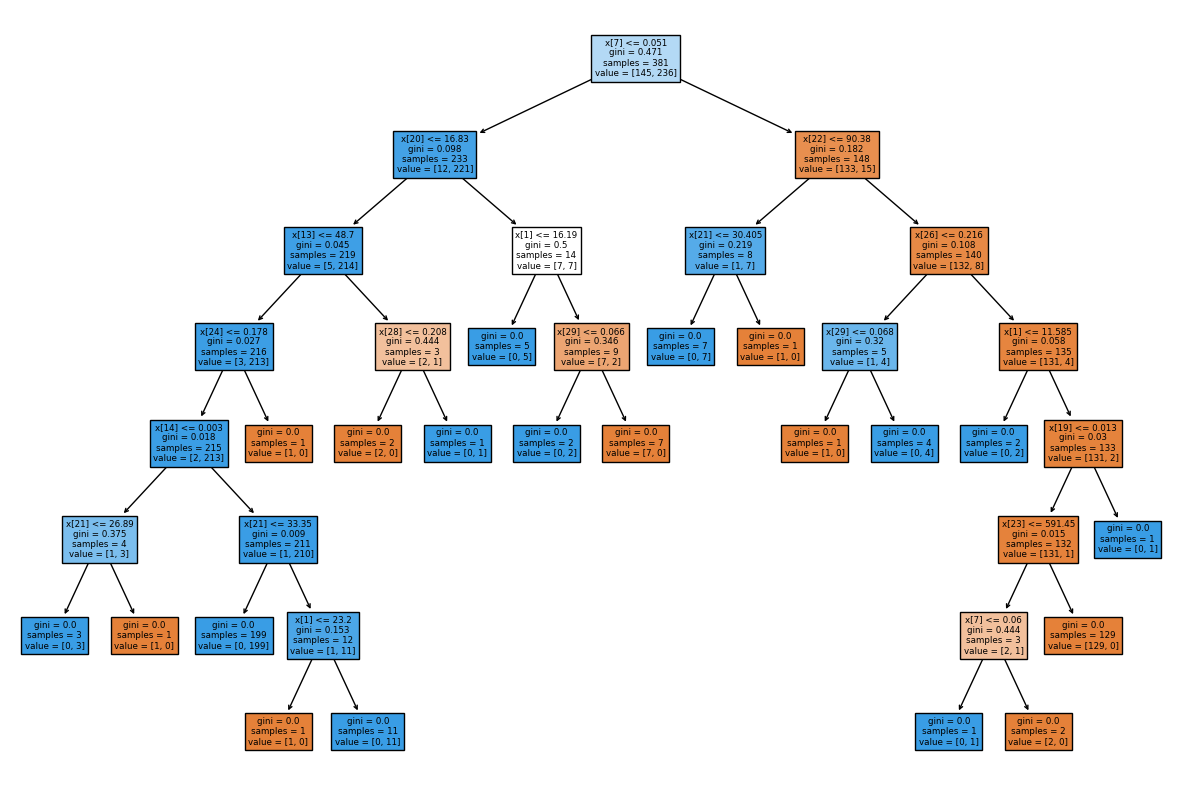

In [33]:
# displaying the tree with the help of sklearn
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier, filled= True)

In [34]:
# we pruning the tree in post proning with 2nd depth parameter: (checking by analysis)

# Post Pruning Technique

# Post proning with max_depth = 2 
treeclassifier = DecisionTreeClassifier(max_depth= 2)

In [35]:
# fiting the tree classifier with max_depth
treeclassifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[7] <= 0.051\ngini = 0.471\nsamples = 381\nvalue = [145, 236]'),
 Text(0.25, 0.5, 'x[20] <= 16.83\ngini = 0.098\nsamples = 233\nvalue = [12, 221]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.045\nsamples = 219\nvalue = [5, 214]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(0.75, 0.5, 'x[22] <= 90.38\ngini = 0.182\nsamples = 148\nvalue = [133, 15]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.108\nsamples = 140\nvalue = [132, 8]')]

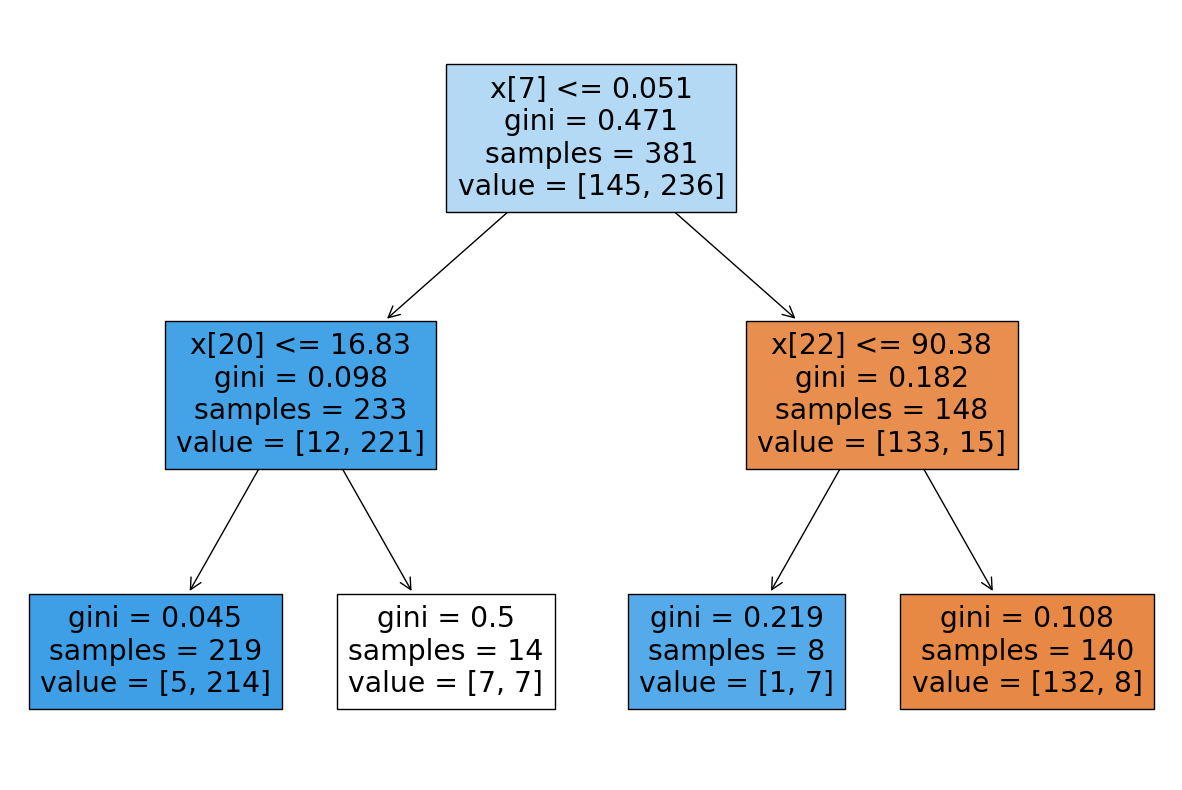

In [36]:
# displaying the tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier, filled= True)

In [37]:
# Prediction:
y_pred = treeclassifier.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [38]:
# checking the accuracy and classifier report
# importing the respective libraries
from sklearn.metrics import accuracy_score, classification_report

In [39]:
# Accuracy score
score = accuracy_score(y_pred, y_test)

# classification report 
print(score)
print(classification_report(y_pred, y_test))

0.925531914893617
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        77
           1       0.90      0.98      0.94       111

    accuracy                           0.93       188
   macro avg       0.94      0.91      0.92       188
weighted avg       0.93      0.93      0.92       188

